In [2]:
import cx_Oracle
import pandas as pd
import json

In [3]:
#connessione al db leggendoli da parametri_conn_db.json
dati_db_conn = json.load(open("parametri_conn_ATP.json"))
nome_db=dati_db_conn[0]["nome_database"]
username_db=dati_db_conn[0]["username"]
password_db=dati_db_conn[0]["password"]
connect_string_db=dati_db_conn[0]["connect_string"]
versione_db=dati_db_conn[0]["versione"]
print (nome_db,versione_db)
try: 
   connection = cx_Oracle.connect(username_db, password_db, connect_string_db)
except cx_Oracle.Error as e:
   print("Errore per " , nome_db)

ATP v18 Autonomous


In [4]:
sqlCommands="select * from  bankfull"
data = pd.read_sql(sqlCommands, con=connection)
df = pd.DataFrame(data)

In [5]:
print (df.head(3))

   AGE          JOB  MARITAL  EDUCATION DEFAULTX  BALANCE HOUSING LOAN  \
0   46  blue-collar  married    unknown       no      842     yes   no   
1   56      retired  married  secondary       no     2330      no   no   
2   36  blue-collar  married  secondary       no        0     yes   no   

     CONTACT  DAY MONTH  DURATION  COMPAIGN  PDAYS  PREVIOUS POUTCOME    Y  
0  telephone    8   may       833         1     -1         0  unknown  yes  
1   cellular    8   may       209         1     -1         0  unknown   no  
2   cellular    8   may       113         1     -1         0  unknown   no  


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

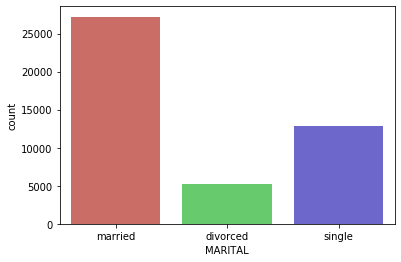

In [7]:
countplt=sns.countplot(x='MARITAL', data=df, palette ='hls')
plt.show()

In [8]:
categ_list = ['Y']
for ele1 in categ_list:
    add = pd.get_dummies(df[ele1], prefix=ele1)  #crea una matrice con i valori dummy (quelli della lista) che sono string con  i valori tradotti 
                                                 #in int con il nome del campo modificato con nome_campo+valore 
    df = df.join(add)                            # aggiunge alla matrice esistente la nuova matrice 
    print (df.head(3))
    
 

   AGE          JOB  MARITAL  EDUCATION DEFAULTX  BALANCE HOUSING LOAN  \
0   46  blue-collar  married    unknown       no      842     yes   no   
1   56      retired  married  secondary       no     2330      no   no   
2   36  blue-collar  married  secondary       no        0     yes   no   

     CONTACT  DAY MONTH  DURATION  COMPAIGN  PDAYS  PREVIOUS POUTCOME    Y  \
0  telephone    8   may       833         1     -1         0  unknown  yes   
1   cellular    8   may       209         1     -1         0  unknown   no   
2   cellular    8   may       113         1     -1         0  unknown   no   

   Y_no  Y_yes  
0     0      1  
1     1      0  
2     1      0  


In [15]:
new_df=df.groupby('JOB').mean()
new_df.head()

,AGE,BALANCE,DAY,DURATION,COMPAIGN,PDAYS,PREVIOUS,Y_no,Y_yes
JOB,,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.877973,0.122027
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.927250,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.917283,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.912097,0.087903
management,40.447711,1763.576716,16.115364,253.995030,2.864545,38.669663,0.668077,0.862430,0.137570


In [42]:
print (new_df['DURATION'] )


Y
no     221.181809
yes    537.294574
Name: DURATION, dtype: float64


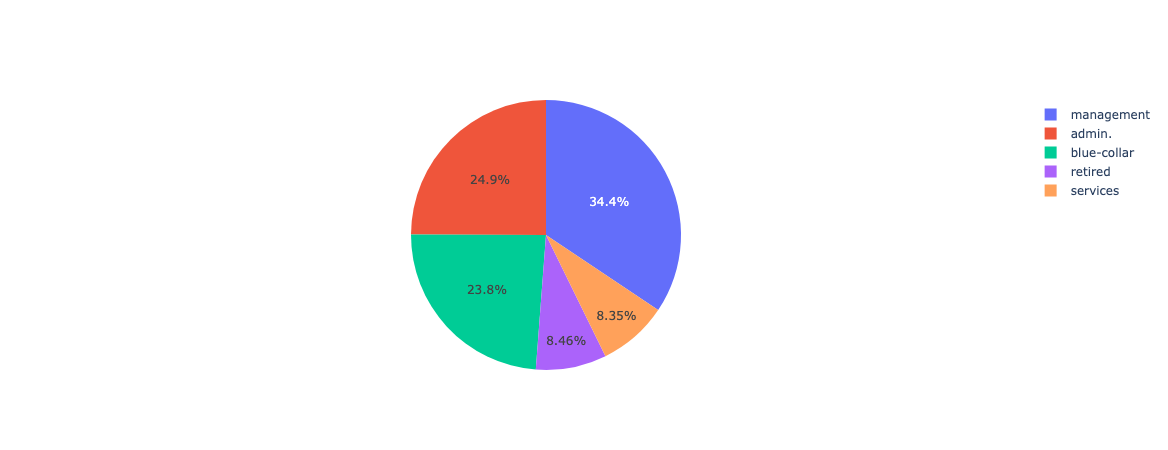

In [18]:
import plotly.graph_objects as go

labels = list(df['JOB'])
values = list(new_df['DURATION'])

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()